In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [3]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename == 'train.csv':
            train_data = pd.read_csv(os.path.join(dirname, filename))
        elif filename == 'test.csv':
            test_data = pd.read_csv(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Test data set has 784 columns, each column represent value of one pixel. Meaning the picture is 28X28X1

Train data set has one more column (feature) and that is target variable

Currently each pixel value for training and test dataset is stored in saperate column
We will need to reshape the data -> Creating N*28*28*1 numpy ND array

In [6]:
# Split the data into features and target
X = train_data.drop('label', axis=1)  # Features
y = train_data['label']  # Target
X=X/255.0
X=X.values.reshape(-1,28,28,1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

Lets now visualize the training image

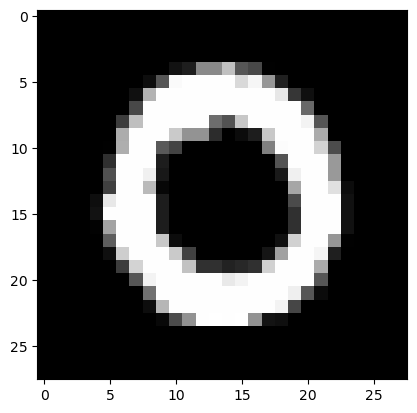

In [7]:
img = np.reshape(X[1], (28, 28))
plt.imshow(img, cmap='gray')

Now that we have the training data in ND array form, we can create a simple CNN model and train it on given data

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=15,batch_size=128, validation_data=(X_val, y_val))

Epoch 1/15
263/263 [==============================] - 42s 154ms/step - loss: 0.4545 - accuracy: 0.8519 - val_loss: 0.0863 - val_accuracy: 0.9730
Epoch 2/15
263/263 [==============================] - 40s 151ms/step - loss: 0.1095 - accuracy: 0.9685 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 3/15
263/263 [==============================] - 40s 152ms/step - loss: 0.0753 - accuracy: 0.9788 - val_loss: 0.0424 - val_accuracy: 0.9879
Epoch 4/15
263/263 [==============================] - 40s 151ms/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.0429 - val_accuracy: 0.9886
Epoch 5/15
263/263 [==============================] - 40s 153ms/step - loss: 0.0519 - accuracy: 0.9860 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 6/15
263/263 [==============================] - 40s 152ms/step - loss: 0.0443 - accuracy: 0.9876 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 7/15
263/263 [==============================] - 40s 151ms/step - loss: 0.0400 - accuracy: 0.9888 - val_loss: 0.0285 - val_ac

Lets Test the classification of this model on Test Data Set

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Split the data into features and target
X_test = test_data
X_test=X_test/255.0
X_test=X_test.values.reshape(-1,28,28,1)

we can see that "0" is being missclassified as "9"

In [12]:
#List of indices where model has classified the digit as "9"
v_train = model.predict(X_train)

1050/1050 [==============================] - 11s 11ms/step


In [13]:
y_train_reset = y_train.reset_index()

In [14]:
indexList = [i for i,v in enumerate(v_train) if (np.argmax(v) == 9 and y_train_reset.iloc[i].label != 9)]
print("Total different predictions: ", len(indexList))

Total different predictions:  7


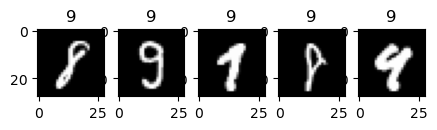

In [15]:
limit = len(indexList) if len(indexList) < 5 else 5
plt.figure(figsize=(5,5))
for i in range (limit):
    actualIndex = indexList[i]
    plt.subplot(1, 5, i+1)
    img = np.reshape(X_train[actualIndex], (28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(np.argmax(v_train[actualIndex]))
plt.show()

Let check where model has classified "0"


In [16]:
#List of indices where model has classified the digit as "0"

indexList = [i for i,v in enumerate(v_train) if (np.argmax(v) == 0 and y_train_reset.iloc[i].label != 0)]
print("Total different predictions: ", len(indexList))

Total different predictions:  2


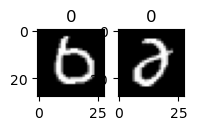

In [17]:
limit = len(indexList) if len(indexList) < 5 else 5
plt.figure(figsize=(5,5))
for i in range (limit):
    actualIndex = indexList[i]
    plt.subplot(1, 5, i+1)
    img = np.reshape(X_train[actualIndex], (28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(np.argmax(v_train[actualIndex]))
plt.show()

Lets also check where model has not classified the digit as "9" but it was actually 9.
and same for 0

In [18]:
indexList = [i for i,v in enumerate(v_train) if (np.argmax(v) != 9 and y_train_reset.iloc[i].label == 9)]
print("Total different predictions: ", len(indexList))

Total different predictions:  23


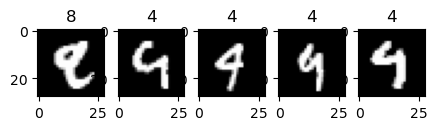

In [19]:
limit = len(indexList) if len(indexList) < 5 else 5
plt.figure(figsize=(5,5))
for i in range (limit):
    actualIndex = indexList[i]
    plt.subplot(1, 5, i+1)
    img = np.reshape(X_train[actualIndex], (28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(np.argmax(v_train[actualIndex]))
plt.show()

In [20]:
indexList = [i for i,v in enumerate(v_train) if (np.argmax(v) != 0 and y_train_reset.iloc[i].label == 0)]
print("Total different predictions: ", len(indexList))

Total different predictions:  1


Lets also count the maximum misclassification was done for which digit

In [21]:
indexValTupleList = [(i,y_train_reset.iloc[i].label) for i,v in enumerate(v_train) if (np.argmax(v) != y_train_reset.iloc[i].label)]
print("Total different predictions: ", len(indexValTupleList))

Total different predictions:  56


In [22]:
df = pd.DataFrame(indexValTupleList, columns=['Index', 'Digit'])
df.Digit.value_counts()

9    23
2     6
5     5
1     5
6     4
8     4
4     4
3     2
7     2
0     1
Name: Digit, dtype: int64

The Errors in the classification seems to be because of the extremly poor hand writing

Thus, the model is good to use on test data set and generate the submission

In [23]:
v_1 = model.predict(X_test)

875/875 [==============================] - 9s 11ms/step


In [24]:
testImgPredList_1 = [np.argmax(v_1[x]) for x in range(50)]

In [25]:
print("Shape of prediction:", v_1.shape)

Shape of prediction: (28000, 10)


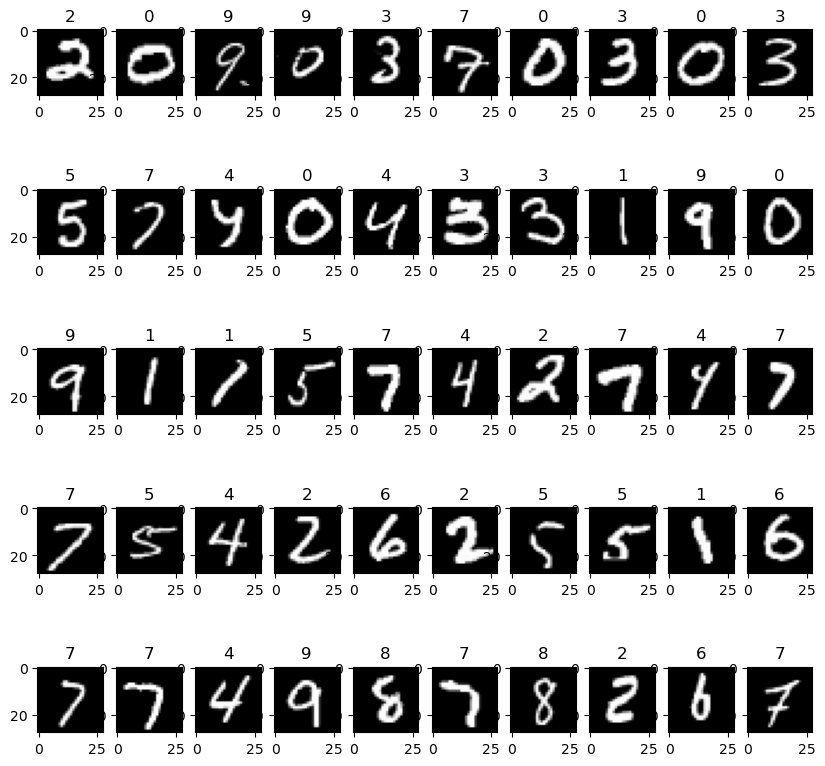

In [26]:


plt.figure(figsize=(10,10))

for i in range (50):
    plt.subplot(5, 10, i+1)
    img = np.reshape(X_test[i], (28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(testImgPredList_1[i])
plt.show()

In [27]:
#Going with first model
#Creating the CSV to Submit
y_pred = [np.argmax(x) for x in v_1]

submissionDict = {'ImageId' : test_data.index + 1}
submission = pd.DataFrame(submissionDict)
submission['Label'] = y_pred

In [28]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [29]:
submission.to_csv('digit_submission.csv', index=False)